## Notebook for Peng-2022 data spatial transcriptomics data processing 
### Developed by: Anna Maguza

### Institute of Computational Biology - Computational Health Centre - Hemlholtz Munich

### 11 November 2022

#### Upload necessary packages

In [1]:
import anndata as ad
import scanpy as sc
import squidpy as sq
import pandas as pd
from scipy.io import mmread
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
from scipy.sparse import coo_matrix
from PIL import Image

#### Setup cells

In [3]:
sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

scanpy==1.9.1 anndata==0.8.0 umap==0.5.1 numpy==1.23.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.3 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8
squidpy==1.2.2


# Colorectal cancer picture 1

#### Data Upload 

In [4]:
#Uploading barcodes
barcodes =pd.read_csv('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon1/barcodes.tsv',sep='\t', header=None, index_col=0)

In [5]:
hires = np.asarray(Image.open('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon1/tissue_hires_image.png'))

In [6]:
lowres = np.asarray(Image.open('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon1/tissue_lowres_image.png'))

In [7]:
#Uploading coordinates
coordinates =pd.read_csv('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon1/coordinates.tsv',delim_whitespace=True, index_col=0)

In [8]:
#Uploading genes
genes =pd.read_csv('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon1/genes.tsv',sep='\t', header=None)

In [10]:
#Uploading matrix
matrix = mmread('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon1/matrix.mtx')

In [11]:
matrix1 = sci.sparse.csr_matrix(matrix)

In [14]:
coords = pd.read_csv(
        "/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon1/tissue_positions_list.csv",
        header=None,
        index_col=0,)

In [15]:
coords.columns = ["in_tissue", "array_row", "array_col", "pxl_col_in_fullres", "pxl_row_in_fullres"]

In [18]:
Peng = ad.AnnData(X=np.transpose(matrix1), var=genes, obs=barcodes, obsm={"spatial": coordinates})

/var/folders/qc/2mwywtjd73z8jw_s09vv_kzm0000gn/T/ipykernel_29999/1678025701.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  Peng = ad.AnnData(X=np.transpose(matrix1), var=genes, obs=barcodes, obsm={"spatial": coordinates})
/Users/annamaguza/miniforge3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [21]:
Peng.obs.index.name = "index"

In [22]:
Peng.obs = pd.merge(Peng.obs, coords, how="left", left_index=True, right_index=True)

In [23]:

Peng.obsm["spatial"] = Peng.obs[["pxl_row_in_fullres", "pxl_col_in_fullres"]].values

In [24]:
Peng.obs.drop(columns=["pxl_row_in_fullres", "pxl_col_in_fullres"], inplace=True)

In [31]:
spatial_key = "spatial"
library_id = "tissue42"
Peng.uns[spatial_key] = {library_id: {}}
Peng.uns[spatial_key][library_id]["images"] = {}
Peng.uns[spatial_key][library_id]["images"] = {"hires": hires, "lowres": lowres}
Peng.uns[spatial_key][library_id]["scalefactors"] = {"spot_diameter_fullres": 130.2320992627276, "tissue_hires_scalef": 0.12207031, "fiducial_diameter_fullres": 210.37492957825225, "tissue_lowres_scalef": 0.036621094}

In [25]:
sc.pp.normalize_total(Peng)

In [63]:
sc.pp.log1p(Peng)

In [27]:
sc.pp.pca(Peng)

In [28]:
sc.pp.neighbors(Peng)

In [29]:
sc.tl.umap(Peng)

In [30]:
sc.tl.leiden(Peng)

/Users/annamaguza/miniforge3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


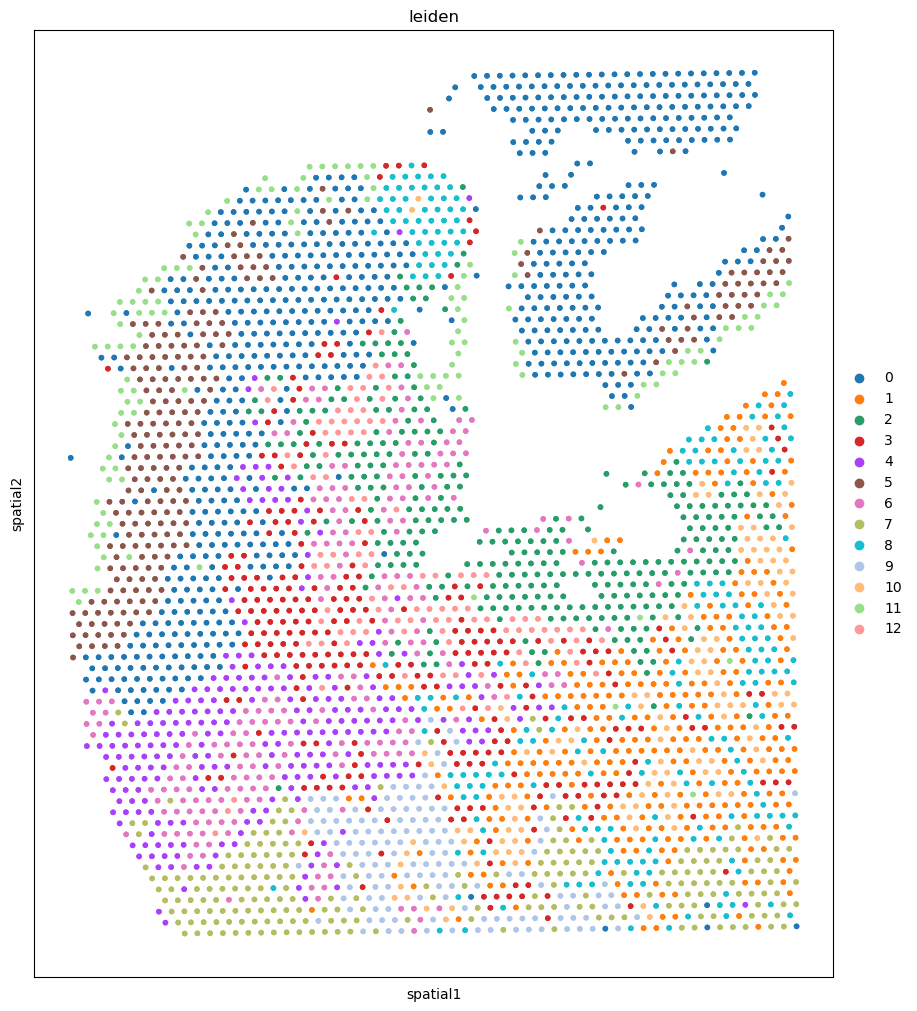

In [42]:
sq.pl.spatial_scatter(Peng, color="leiden", shape=None, figsize=(10, 10))

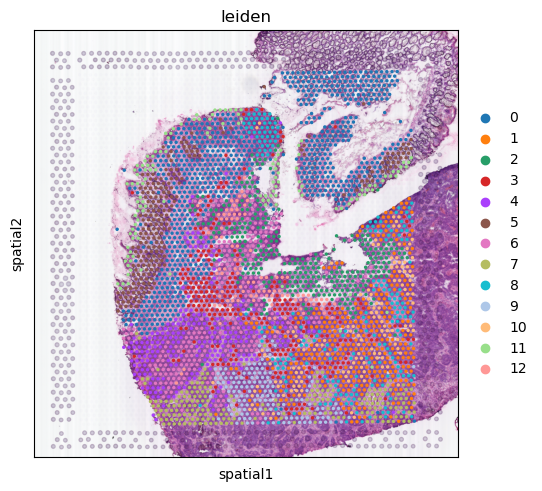

In [43]:
sq.pl.spatial_scatter(Peng, color="leiden")

/Users/annamaguza/miniforge3/envs/spatial/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 1000/1000 [00:05<00:00, 175.56/s]


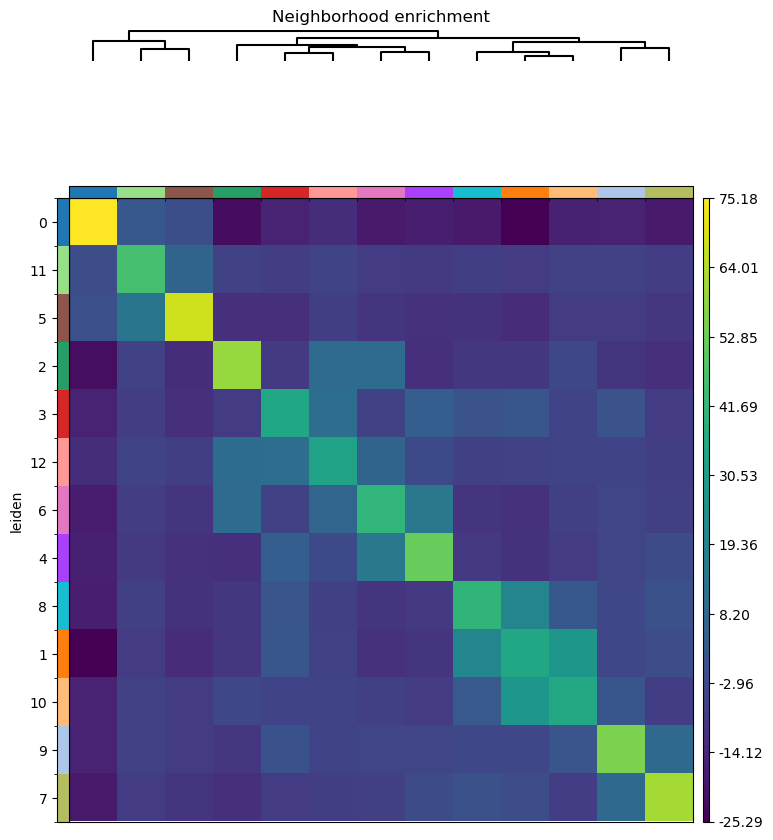

In [45]:
sq.gr.spatial_neighbors(Peng, coord_type="generic")
sq.gr.nhood_enrichment(Peng, cluster_key="leiden")
sq.pl.nhood_enrichment(Peng, cluster_key="leiden", method="ward")

# Colorectal cancer picture 2

#### Data Upload 

In [47]:
#Uploading barcodes
barcodes2 =pd.read_csv('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon2/barcodes.tsv',sep='\t', header=None, index_col=0)

In [48]:
hires2 = np.asarray(Image.open('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon2/tissue_hires_image.png'))

In [49]:
lowres2 = np.asarray(Image.open('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon2/tissue_lowres_image.png'))

In [73]:
#Uploading coordinates
coordinates2 =pd.read_csv('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon2/coordinates.tsv',delim_whitespace=True, index_col=0)

In [51]:
#Uploading genes
genes2 =pd.read_csv('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon2/genes.tsv',sep='\t', header=None)

In [52]:
#Uploading matrix
matrix2 = mmread('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon2/matrix.mtx')

In [53]:
matrix2 = sci.sparse.csr_matrix(matrix2)

In [54]:
coords2 = pd.read_csv(
        "/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon2/tissue_positions_list.csv",
        header=None,
        index_col=0,)

In [55]:
coords2.columns = ["in_tissue", "array_row", "array_col", "pxl_col_in_fullres", "pxl_row_in_fullres"]

In [56]:
Peng2 = ad.AnnData(X=np.transpose(matrix2), var=genes2, obs=barcodes2, obsm={"spatial": coordinates2})

/var/folders/qc/2mwywtjd73z8jw_s09vv_kzm0000gn/T/ipykernel_29999/2002429904.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  Peng2 = ad.AnnData(X=np.transpose(matrix2), var=genes2, obs=barcodes2, obsm={"spatial": coordinates2})
/Users/annamaguza/miniforge3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [57]:
Peng2.obs.index.name = "index"

In [58]:
Peng2.obs = pd.merge(Peng2.obs, coords2, how="left", left_index=True, right_index=True)

In [59]:

Peng2.obsm["spatial"] = Peng2.obs[["pxl_row_in_fullres", "pxl_col_in_fullres"]].values

In [60]:
Peng2.obs.drop(columns=["pxl_row_in_fullres", "pxl_col_in_fullres"], inplace=True)

In [61]:
spatial_key = "spatial"
library_id = "tissue42"
Peng2.uns[spatial_key] = {library_id: {}}
Peng2.uns[spatial_key][library_id]["images"] = {}
Peng2.uns[spatial_key][library_id]["images"] = {"hires": hires2, "lowres": lowres2}
Peng2.uns[spatial_key][library_id]["scalefactors"] = {"spot_diameter_fullres": 130.15841600880097, "tissue_hires_scalef": 0.12112403, "fiducial_diameter_fullres": 210.25590278344774, "tissue_lowres_scalef": 0.036337208}

In [64]:
sc.pp.normalize_total(Peng2)

In [65]:
sc.pp.log1p(Peng2)

In [66]:
sc.pp.pca(Peng2)

In [67]:
sc.pp.neighbors(Peng2)

In [68]:
sc.tl.umap(Peng2)

In [69]:
sc.tl.leiden(Peng2)

/Users/annamaguza/miniforge3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


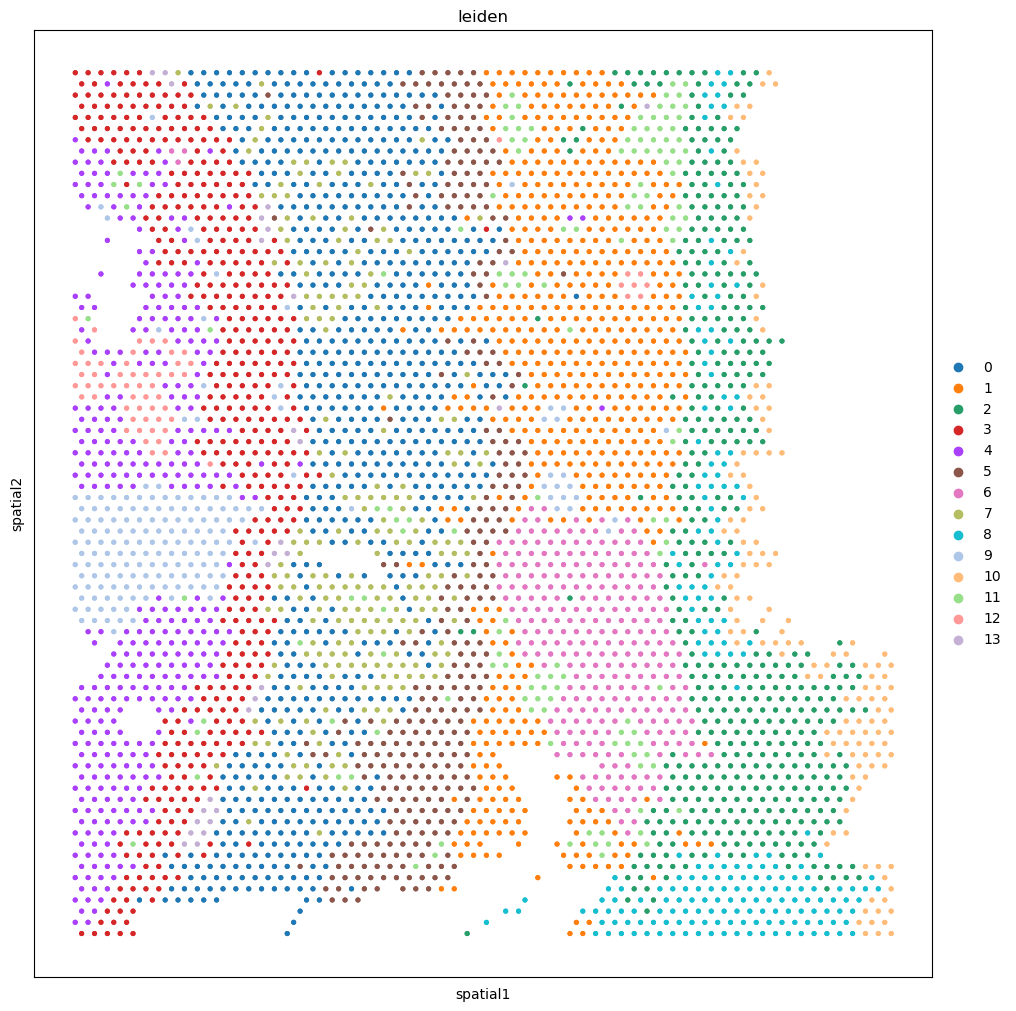

In [70]:
sq.pl.spatial_scatter(Peng2, color="leiden", shape=None, figsize=(10, 10))

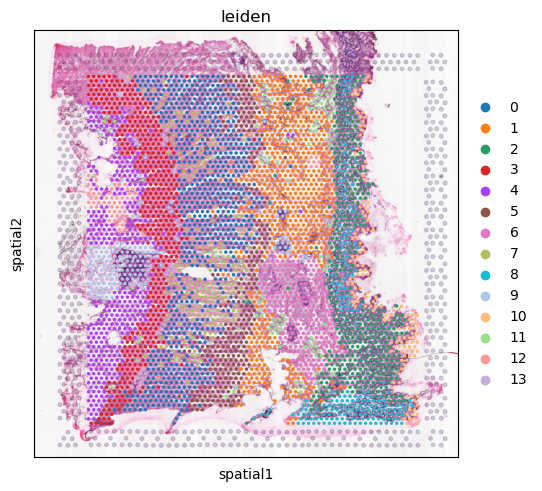

In [71]:
sq.pl.spatial_scatter(Peng2, color="leiden")

100%|██████████| 1000/1000 [00:05<00:00, 180.98/s]


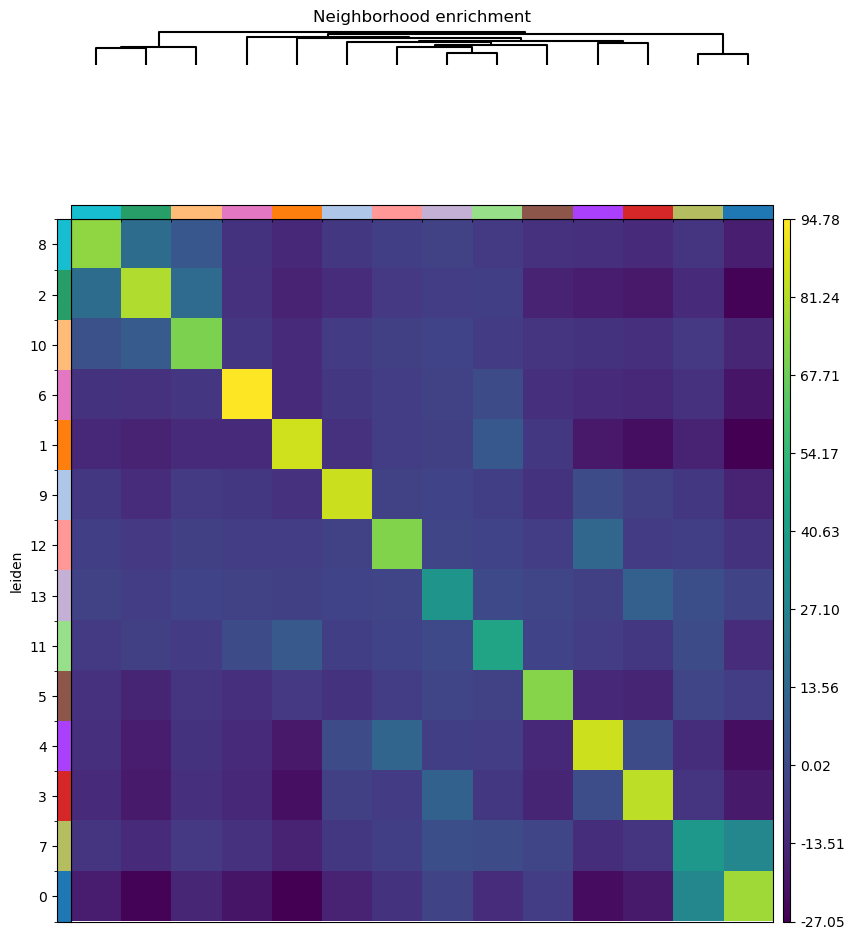

In [72]:
sq.gr.spatial_neighbors(Peng2, coord_type="generic")
sq.gr.nhood_enrichment(Peng2, cluster_key="leiden")
sq.pl.nhood_enrichment(Peng2, cluster_key="leiden", method="ward")

# Colorectal cancer picture 3

#### Data Upload 

In [74]:
#Uploading barcodes
barcodes3 =pd.read_csv('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon3/barcodes.tsv',sep='\t', header=None, index_col=0)

In [75]:
hires3 = np.asarray(Image.open('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon3/tissue_hires_image.png'))

In [76]:
lowres3 = np.asarray(Image.open('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon3/tissue_lowres_image.png'))

In [77]:
#Uploading coordinates
coordinates3 =pd.read_csv('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon3/coordinates.tsv',delim_whitespace=True, index_col=0)

In [78]:
#Uploading genes
genes3 =pd.read_csv('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon3/genes.tsv',sep='\t', header=None)

In [79]:
#Uploading matrix
matrix3 = mmread('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon3/matrix.mtx')

In [80]:
matrix3 = sci.sparse.csr_matrix(matrix3)

In [81]:
coords3 = pd.read_csv(
        "/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon3/tissue_positions_list.csv",
        header=None,
        index_col=0,)

In [82]:
coords3.columns = ["in_tissue", "array_row", "array_col", "pxl_col_in_fullres", "pxl_row_in_fullres"]

In [83]:
Peng3 = ad.AnnData(X=np.transpose(matrix3), var=genes3, obs=barcodes3, obsm={"spatial": coordinates3})

/var/folders/qc/2mwywtjd73z8jw_s09vv_kzm0000gn/T/ipykernel_29999/3261874421.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  Peng3 = ad.AnnData(X=np.transpose(matrix3), var=genes3, obs=barcodes3, obsm={"spatial": coordinates3})
/Users/annamaguza/miniforge3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [84]:
Peng3.obs.index.name = "index"

In [86]:
Peng3.obs = pd.merge(Peng3.obs, coords3, how="left", left_index=True, right_index=True)

In [87]:

Peng3.obsm["spatial"] = Peng3.obs[["pxl_row_in_fullres", "pxl_col_in_fullres"]].values

In [88]:
spatial_key = "spatial"
library_id = "tissue42"
Peng3.uns[spatial_key] = {library_id: {}}
Peng3.uns[spatial_key][library_id]["images"] = {}
Peng3.uns[spatial_key][library_id]["images"] = {"hires": hires3, "lowres": lowres3}
Peng3.uns[spatial_key][library_id]["scalefactors"] = {"spot_diameter_fullres": 130.15207564120408, "tissue_hires_scalef": 0.12112403, "fiducial_diameter_fullres": 210.24566065117583, "tissue_lowres_scalef": 0.036337208}

In [89]:
sc.pp.normalize_total(Peng3)

In [90]:
sc.pp.log1p(Peng3)

In [91]:
sc.pp.pca(Peng3)

In [92]:
sc.pp.neighbors(Peng3)

In [93]:
sc.tl.umap(Peng3)

In [94]:
sc.tl.leiden(Peng3)

/Users/annamaguza/miniforge3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


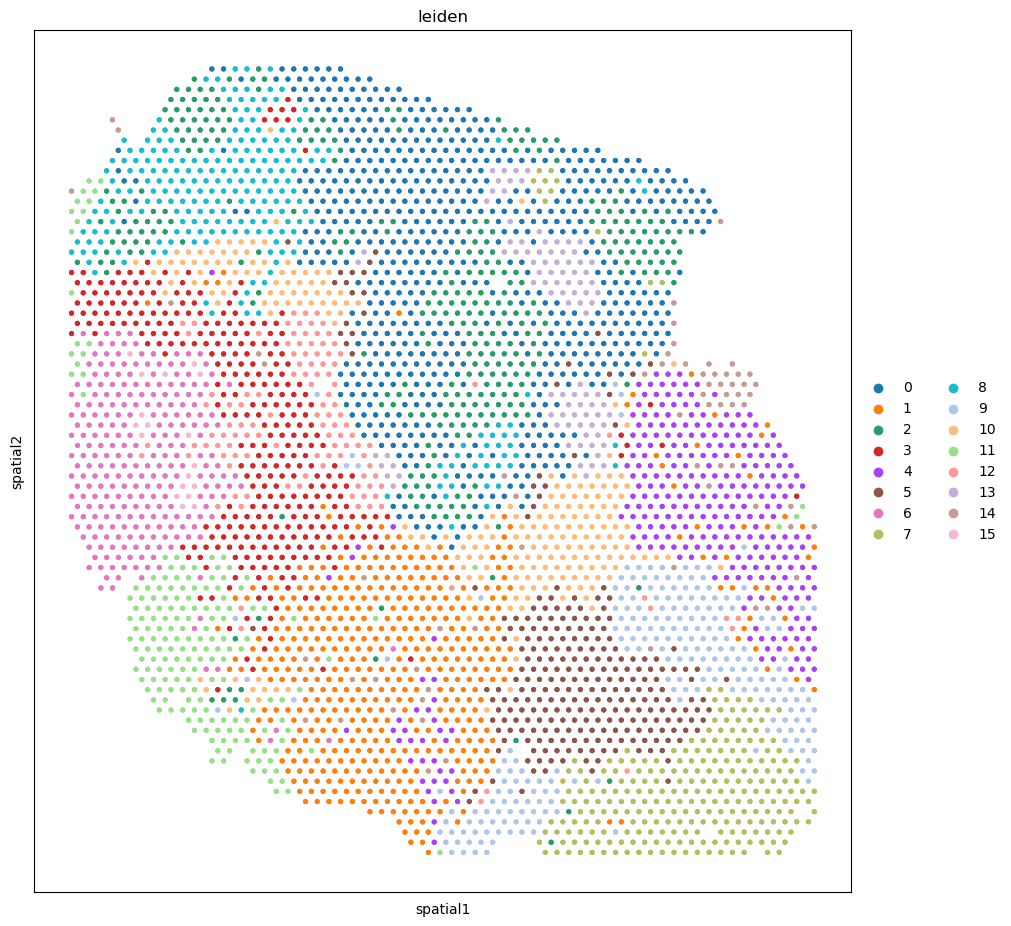

In [95]:
sq.pl.spatial_scatter(Peng3, color="leiden", shape=None, figsize=(10, 10))

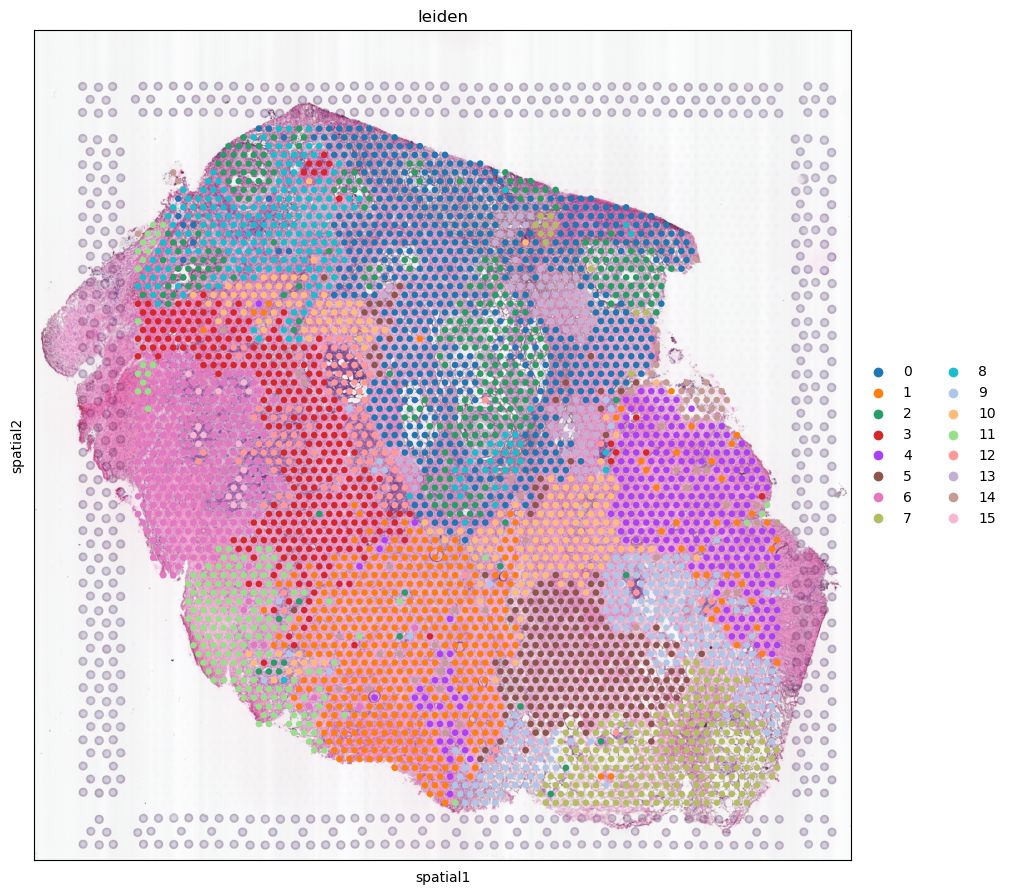

In [96]:
sq.pl.spatial_scatter(Peng3, color="leiden", figsize=(10, 10))

100%|██████████| 1000/1000 [00:09<00:00, 108.10/s]


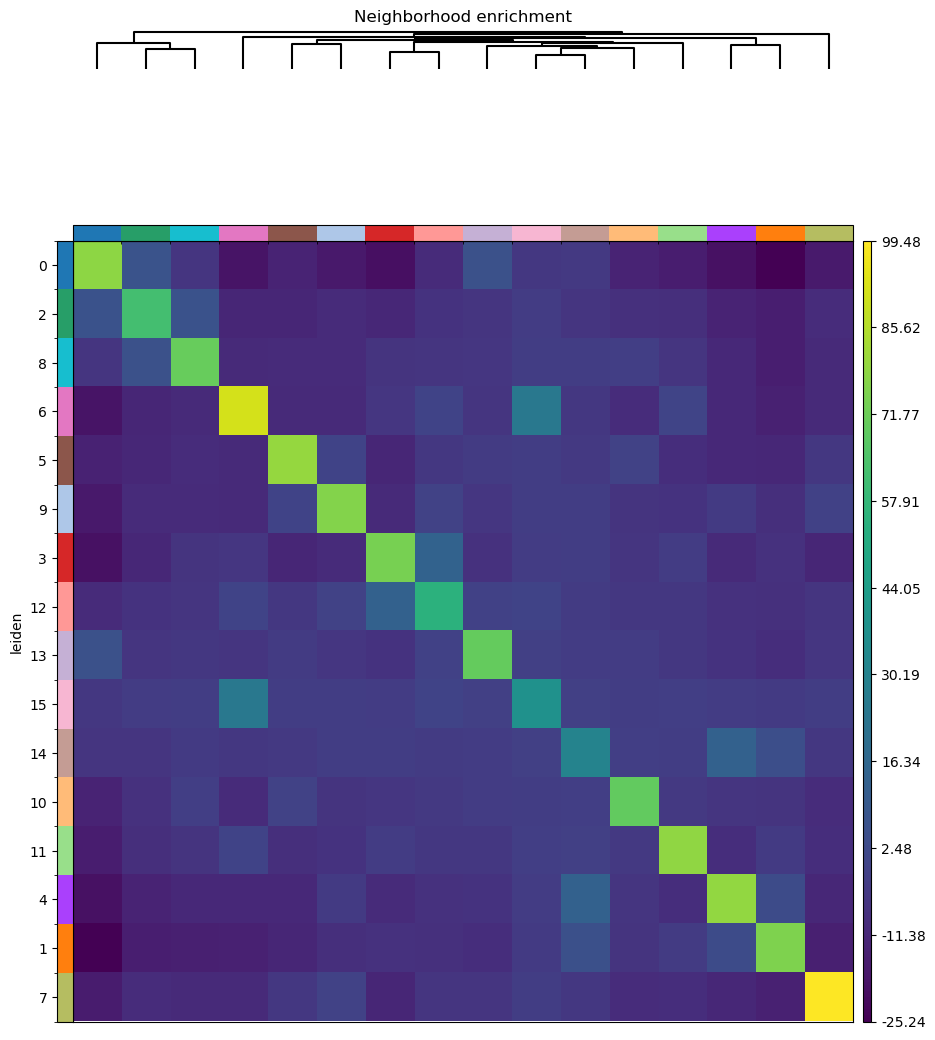

In [98]:
sq.gr.spatial_neighbors(Peng3, coord_type="generic")
sq.gr.nhood_enrichment(Peng3, cluster_key="leiden")
sq.pl.nhood_enrichment(Peng3, cluster_key="leiden", method="ward")

# Colorectal cancer picture 4

#### Data Upload 

In [99]:
#Uploading barcodes
barcodes4 =pd.read_csv('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon4/barcodes.tsv',sep='\t', header=None, index_col=0)

In [100]:
hires4 = np.asarray(Image.open('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon4/tissue_hires_image.png'))

In [101]:
lowres4 = np.asarray(Image.open('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon4/tissue_lowres_image.png'))

In [102]:
#Uploading coordinates
coordinates4 =pd.read_csv('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon4/coordinates.tsv',delim_whitespace=True, index_col=0)

In [103]:
#Uploading genes
genes4 =pd.read_csv('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon4/genes.tsv',sep='\t', header=None)

In [104]:
#Uploading matrix
matrix4 = mmread('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon4/matrix.mtx')

In [105]:
matrix4 = sci.sparse.csr_matrix(matrix4)

In [106]:
coords4 = pd.read_csv(
        "/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon4/tissue_positions_list.csv",
        header=None,
        index_col=0,)

In [107]:
coords4.columns = ["in_tissue", "array_row", "array_col", "pxl_col_in_fullres", "pxl_row_in_fullres"]

In [108]:
Peng4 = ad.AnnData(X=np.transpose(matrix4), var=genes4, obs=barcodes4, obsm={"spatial": coordinates4})

/var/folders/qc/2mwywtjd73z8jw_s09vv_kzm0000gn/T/ipykernel_29999/2898693385.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  Peng4 = ad.AnnData(X=np.transpose(matrix4), var=genes4, obs=barcodes4, obsm={"spatial": coordinates4})
/Users/annamaguza/miniforge3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [109]:
Peng4.obs.index.name = "index"

In [110]:
Peng4.obs = pd.merge(Peng4.obs, coords4, how="left", left_index=True, right_index=True)

In [111]:

Peng4.obsm["spatial"] = Peng4.obs[["pxl_row_in_fullres", "pxl_col_in_fullres"]].values

In [112]:
spatial_key = "spatial"
library_id = "tissue42"
Peng4.uns[spatial_key] = {library_id: {}}
Peng4.uns[spatial_key][library_id]["images"] = {}
Peng4.uns[spatial_key][library_id]["images"] = {"hires": hires4, "lowres": lowres4}
Peng4.uns[spatial_key][library_id]["scalefactors"] = {"spot_diameter_fullres": 130.0637145542045, "tissue_hires_scalef": 0.12207031, "fiducial_diameter_fullres": 210.10292351063802, "tissue_lowres_scalef": 0.036621094}

In [113]:
sc.pp.normalize_total(Peng4)

In [114]:
sc.pp.log1p(Peng4)

In [115]:
sc.pp.pca(Peng4)

In [116]:
sc.pp.neighbors(Peng4)

In [117]:
sc.tl.umap(Peng4)

In [118]:
sc.tl.leiden(Peng4)

/Users/annamaguza/miniforge3/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


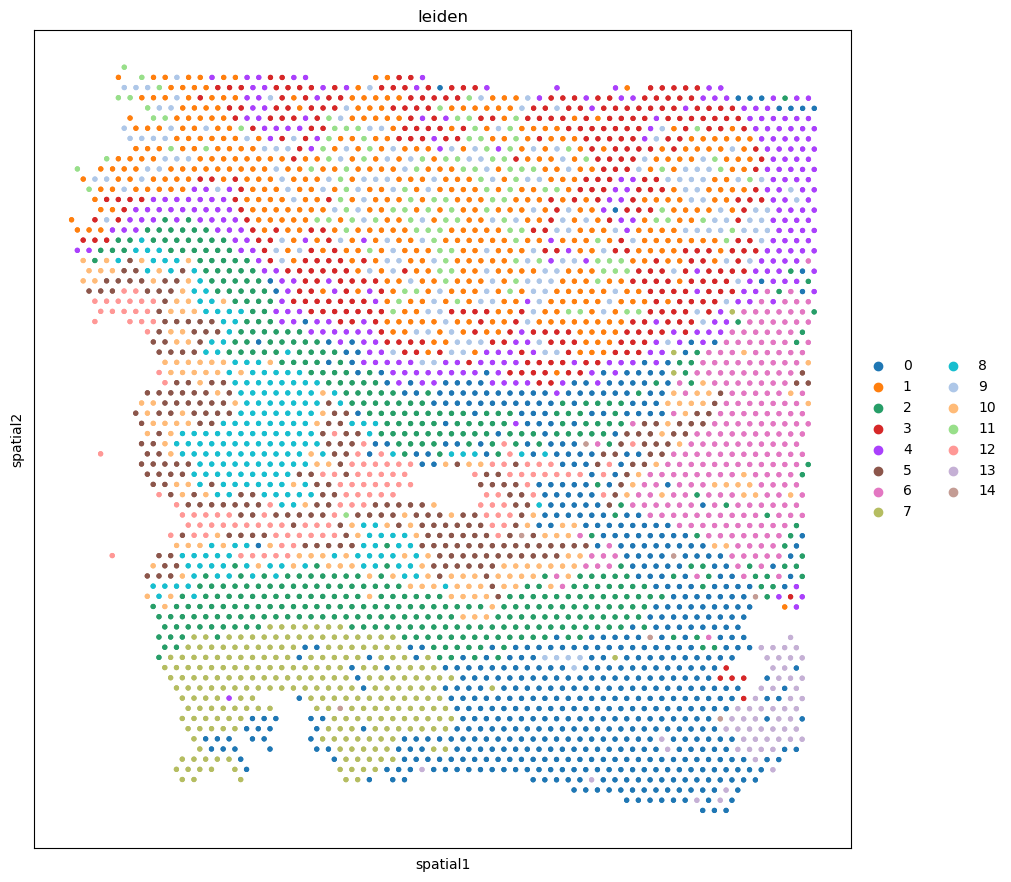

In [119]:
sq.pl.spatial_scatter(Peng4, color="leiden", shape=None, figsize=(10, 10))

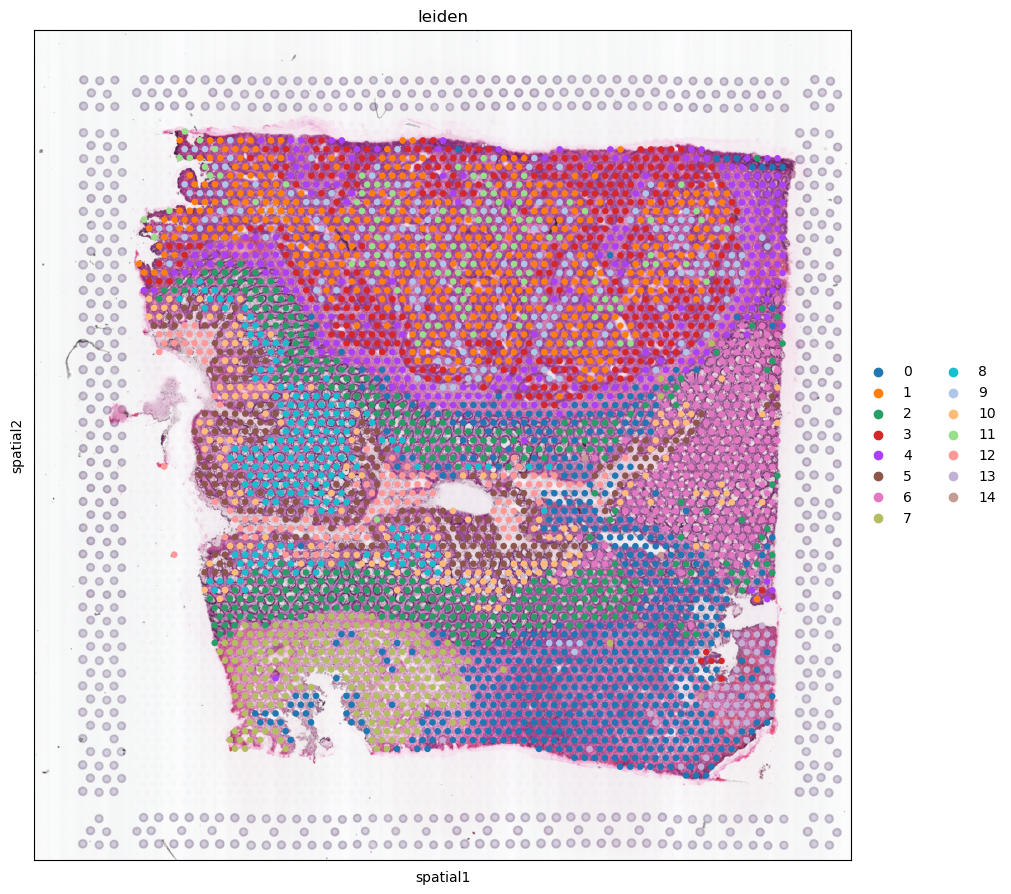

In [120]:
sq.pl.spatial_scatter(Peng4, color="leiden", figsize=(10, 10))

100%|██████████| 1000/1000 [00:05<00:00, 184.09/s]


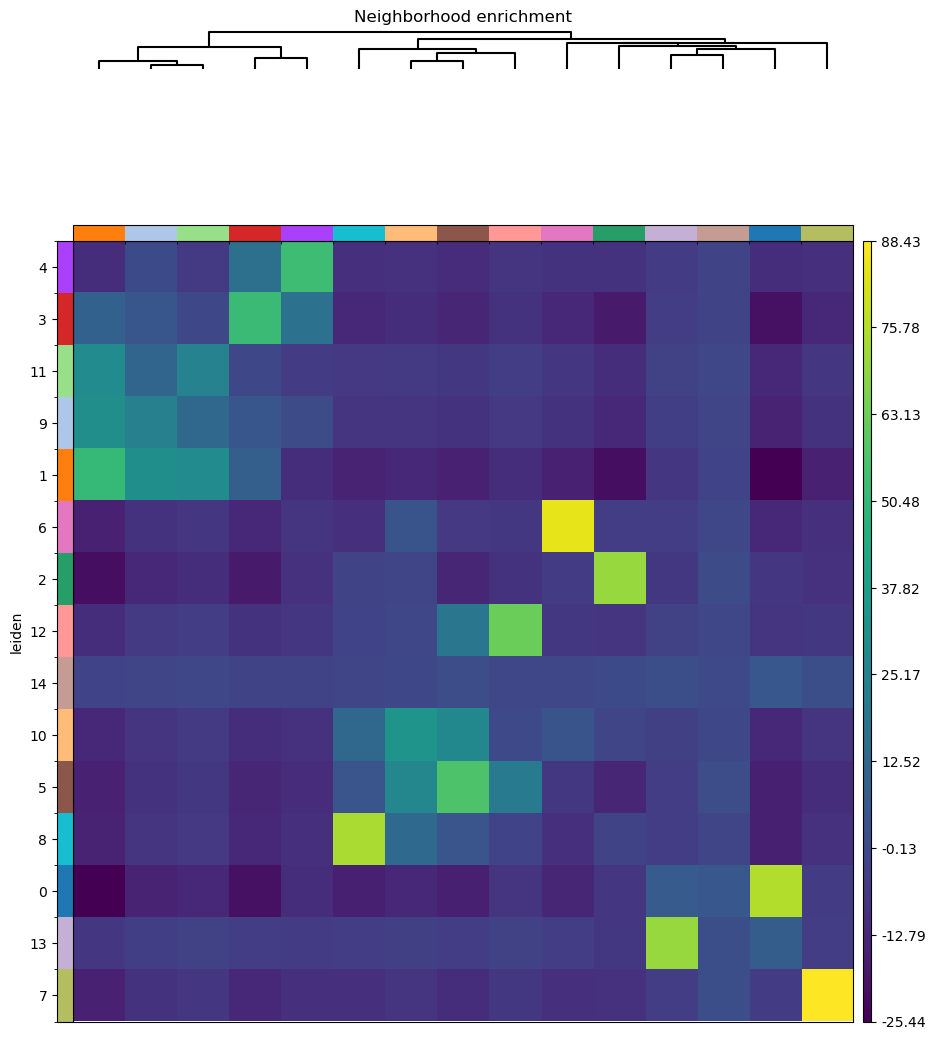

In [121]:
sq.gr.spatial_neighbors(Peng4, coord_type="generic")
sq.gr.nhood_enrichment(Peng4, cluster_key="leiden")
sq.pl.nhood_enrichment(Peng4, cluster_key="leiden", method="ward")